In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

### Read the Image

900 604 3
543600 3


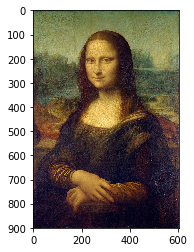

In [66]:
pic = plt.imread('604px-Mona_Lisa.jpg')
plt.imshow(pic)
pic_height, pic_width, channels = pic.shape
ground_truth = pic.reshape(-1, channels)
length, _ = ground_truth.shape
print(pic_height, pic_width, channels)
print(length, _)

### Preprocessing the Input

#### uniformly sample 5,000 random (x,y) coordinate locations as training data set

In [74]:
# sample 5000 x 5 [x, y, r, g, b]

sample_size = 5000

indexes = np.arange(length)
chosen_idx = np.random.choice(indexes, size=sample_size, replace=False)

xs = np.array([int(i / pic_width) for i in indexes])
ys = np.array([i % pic_width for i in indexes])
colors = ground_truth[chosen_idx, :].astype(np.float) / 255
train_data = np.column_stack((xs[chosen_idx], ys[chosen_idx], colors))

print(chosen_idx.shape, length)

# not_in_indices = [False if i in chosen_idx else True for i in range(length)]

x_train = train_data[:, :2]
y_train = train_data[:, 2:]
x_test = np.column_stack((xs , ys))
y_test = ground_truth / 255.0

# x_test = np.column_stack((xs[not_in_indices] , ys[not_in_indices]))
# y_test = ground_truth[not_in_indices, :] / 255.0

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

(5000,) 543600
x_train: (5000, 2)
y_train: (5000, 3)
x_test: (543600, 2)
y_test: (543600, 3)


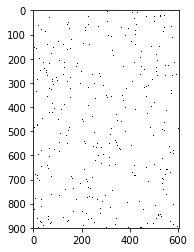

In [75]:
chosen_sample = np.ones((length ,1))
chosen_sample[chosen_idx] = 0
plt.imshow(chosen_sample.reshape(pic_height, pic_width), cmap='gray')
plt.show()

### Preprocessing the Output

#### Learn a different function for each channel

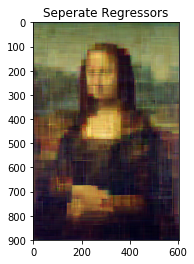

In [93]:
rfr_r = RandomForestRegressor(); rfr_r.fit(x_train, y_train[:, 0])
rfr_g = RandomForestRegressor(); rfr_g.fit(x_train, y_train[:, 1])
rfr_b = RandomForestRegressor(); rfr_b.fit(x_train, y_train[:, 2])

pred_pic = np.column_stack((rfr_r.predict(x_test), rfr_g.predict(x_test), rfr_b.predict(x_test)))
pred_pic = pred_pic.reshape(pic_height, pic_width, channels)
plt.title('Seperate Regressors')
plt.imshow(pred_pic)

#### Regress all three values at once

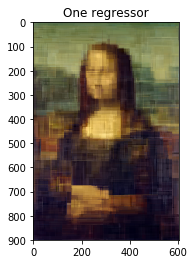

In [94]:
rfr = RandomForestRegressor(); rfr.fit(train_data[:, :2], train_data[:, 2:])

# plt.subplot(1,2,2)
pred_pic = rfr.predict(x_test).reshape(pic_height, pic_width, channels)
plt.title('One regressor')
plt.imshow(pred_pic)